## Problem 0: Path manager implementation
Implement the following and ensure the unit tests pass.
* `chap11/path_manager_utilities.py`:
  * `inHalfSpace(...)`
* `chap11/line_manager.py`:
  * `construct_line(...)`
  * `line_manager(...)`
* `chap11/fillet_manager.py`:
  * `construct_fillet_line(...)`
  * `construct_fillet_circle(...)`
  * `fillet_manager(...)`

### Hints on implementation
* `np.linalg.norm(...)` will be very useful for computing the norm of a vector
* Make sure to set the airspeed on your paths. The airspeed can be found using `path.airspeed = get_airspeed(waypoints, ptr)`
* Problems 1 and 2 help guide you to accounting for singularities
* The path manager does not clear after use, so you will see the previous paths on the display if you run all of them sequentially.

### Note on the unit tests
There will be no unit tests for the `line_manager(...)` and `fillet_manager(...)` functions. Furthermore, there are several scenarios where dividing by zero becomes an issue. As these are singularities that can be handled in various ways, there is not a correct answer. Thus, these cases may not all arise in the unit tests, but they will be tested in the problems 1 and 2.


In [1]:
import mav_sim.parameters.planner_parameters as PLAN
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap11.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.message_types.msg_waypoints import MsgWaypoints

from mav_sim.chap11.waypoint_viewer import WaypointViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view

# The viewers need to be initialized once due to restart issues with qtgraph
if "path_view" not in globals():
    print("Initializing waypoint viewer")
    global waypoint_view
    waypoint_view = WaypointViewer()
if "data_view" not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()

# Initialize the simulation parameters
sim_params_default = MsgSimParams(
    end_time=130.0, video_name="cha11.avi"
)  # Sim ending in 10 seconds
state = DynamicState()

# Function for running simulation and displaying results
def run_sim_and_display(
    waypoints: MsgWaypoints, sim_params: MsgSimParams = sim_params_default
):
    global waypoint_view
    global data_view
    waypoint_view.plot_initialized = False
    data_view.reset(sim_params.start_time)
    (waypoint_view, data_view) = run_sim(
        sim=sim_params,
        waypoints=waypoints,
        init_state=state,
        waypoint_view=waypoint_view,
        data_view=data_view,
    )
    display_data_view(data_view)
    display_mav_view(waypoint_view)

136.62760706610337
Initializing waypoint viewer
Initializing data_view


previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
previous [[   0.]
 [   0.]
 [-100.]]
p

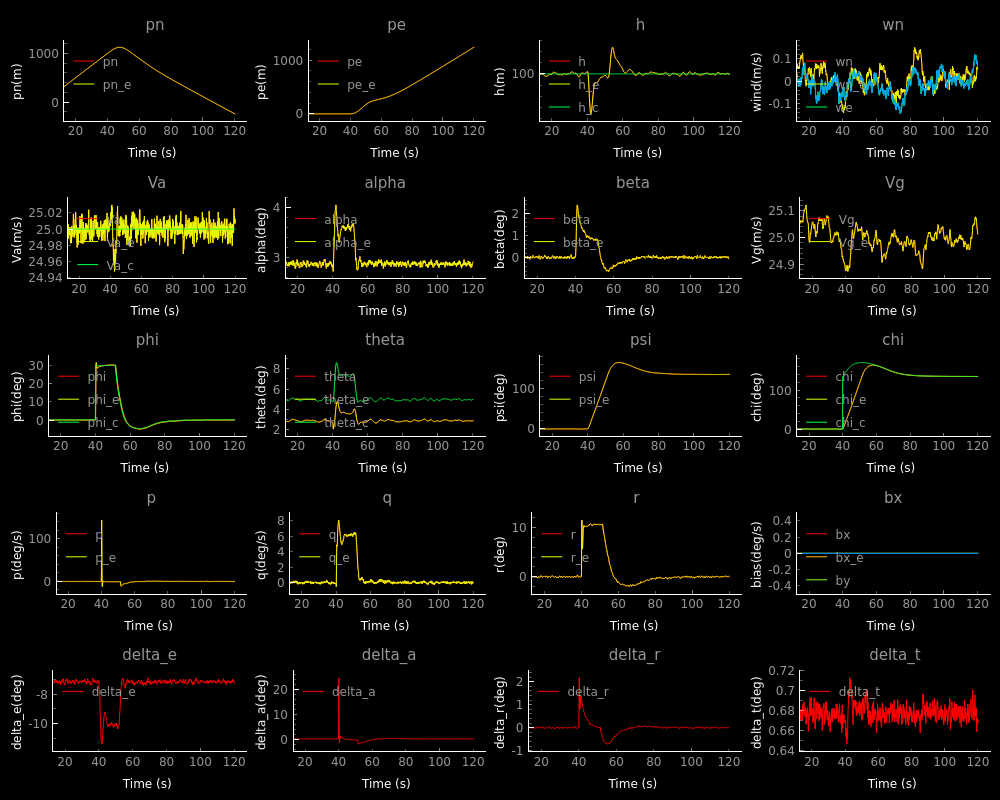

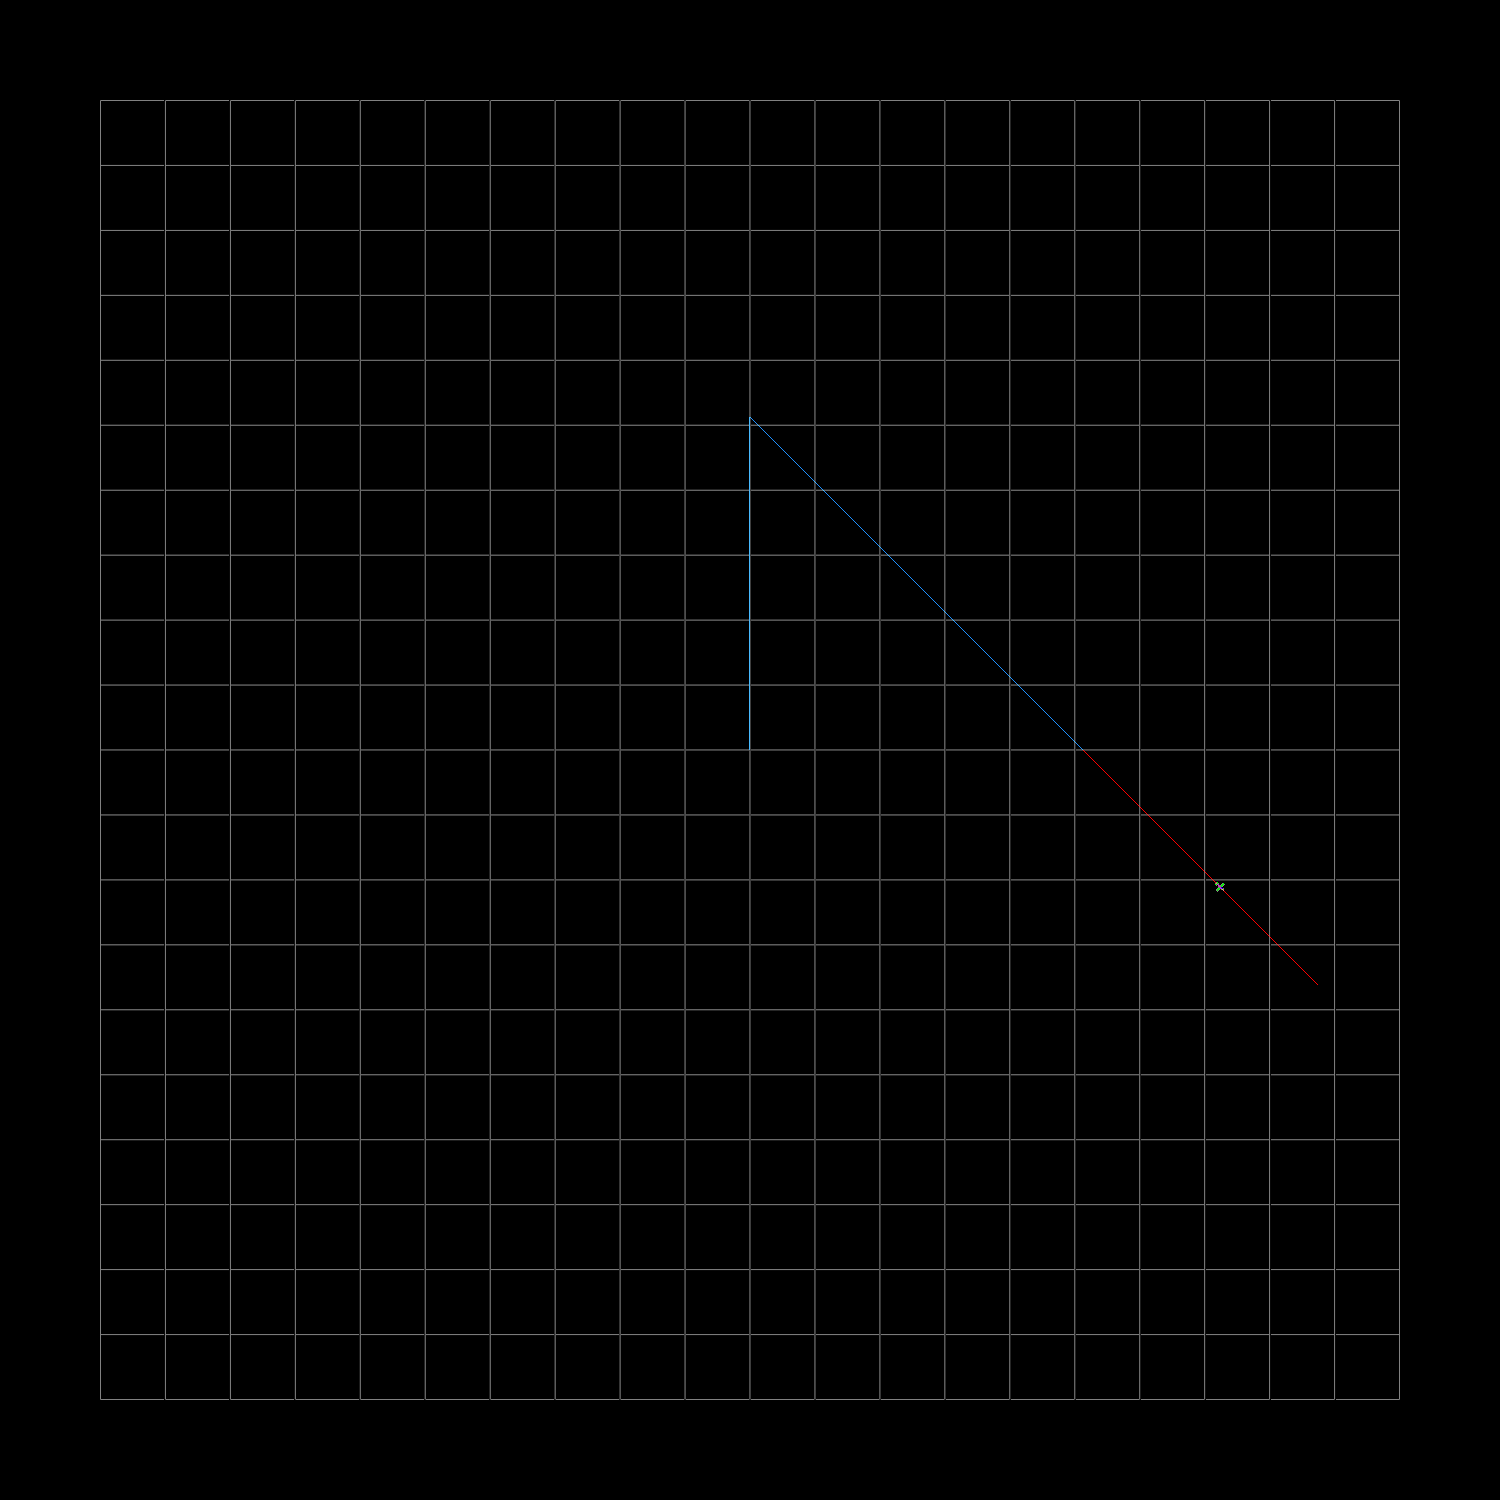

In [2]:
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "straight_line"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[1000, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[0, 1000, -100]]).T, Va, np.radians(45), np.inf, 0, 0)

# Run the simulation
run_sim_and_display(waypoints=waypoints)

## Problem 1 - Straight line fillet paths
There are two scenarios where the fillet path equations have a singularity. The first is the most common: the waypoints cannot form a straight line. This is very problematic because many paths have three waypoints that are colinear. In fact, the default motion for the UAV once it has reached the final waypoint is to proceed in a straight line.

Modify `construct_fillet_line` and/or `construct_fillet_circle` so that the fillet path manager will work for the code below. Make sure that the unit tests still pass.

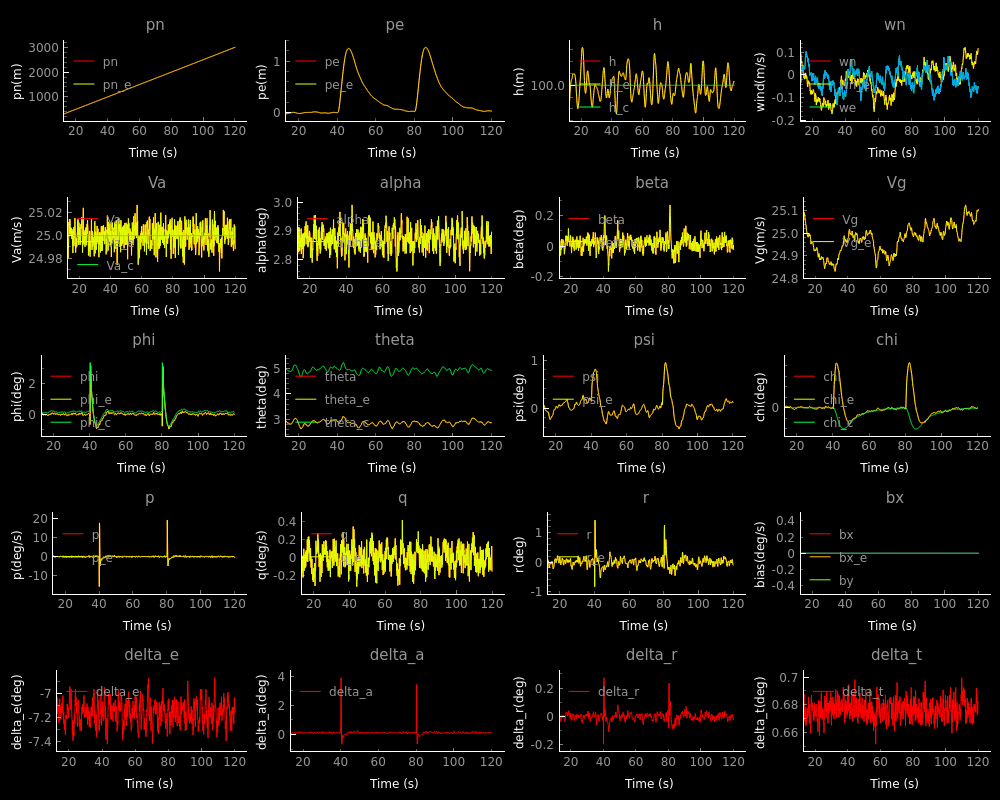

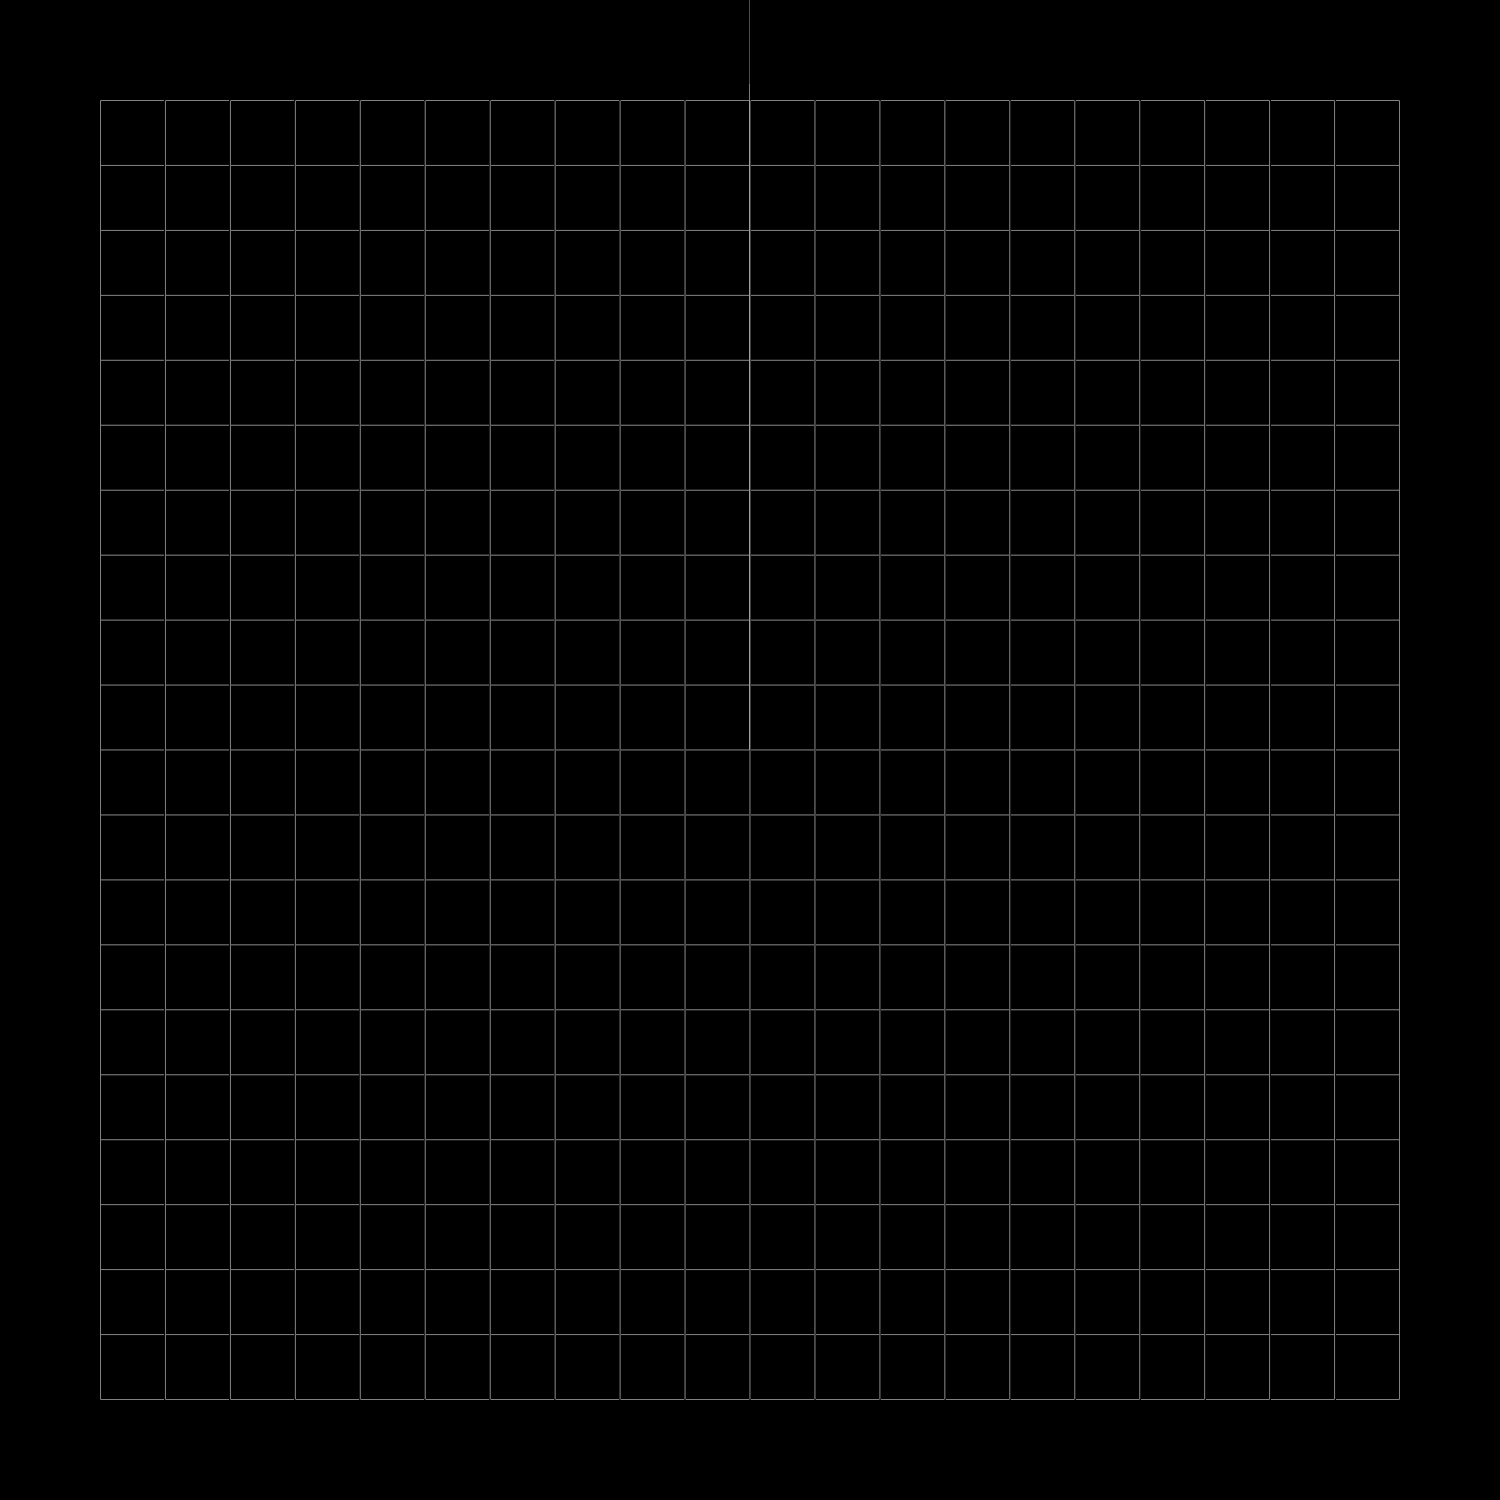

In [2]:
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "fillet"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[1000, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[2000, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)

# Run the simulation
run_sim_and_display(waypoints=waypoints)

## Problem 2 - Paths that fold back
The second scenario with singularities actually occurs in both straight-line and fillet paths. The case occurs when the path folds back onto itself. While not as common of an occurance, it must be dealt with regardless. 

Modify `construct_fillet_line`, `construct_fillet_circle`, and `construct_line` so that the path managers will work for the code below. The switching behaviors are ill-defined in this case. Redesign them so that if a path will fold back onto itself, the UAV will make it all the way to the waypoint before starting back. Make sure that the unit tests still pass.

If you use the same waypoints message then make sure you update flags accordingly:
* `waypoints.flag_waypoints_changed = True`

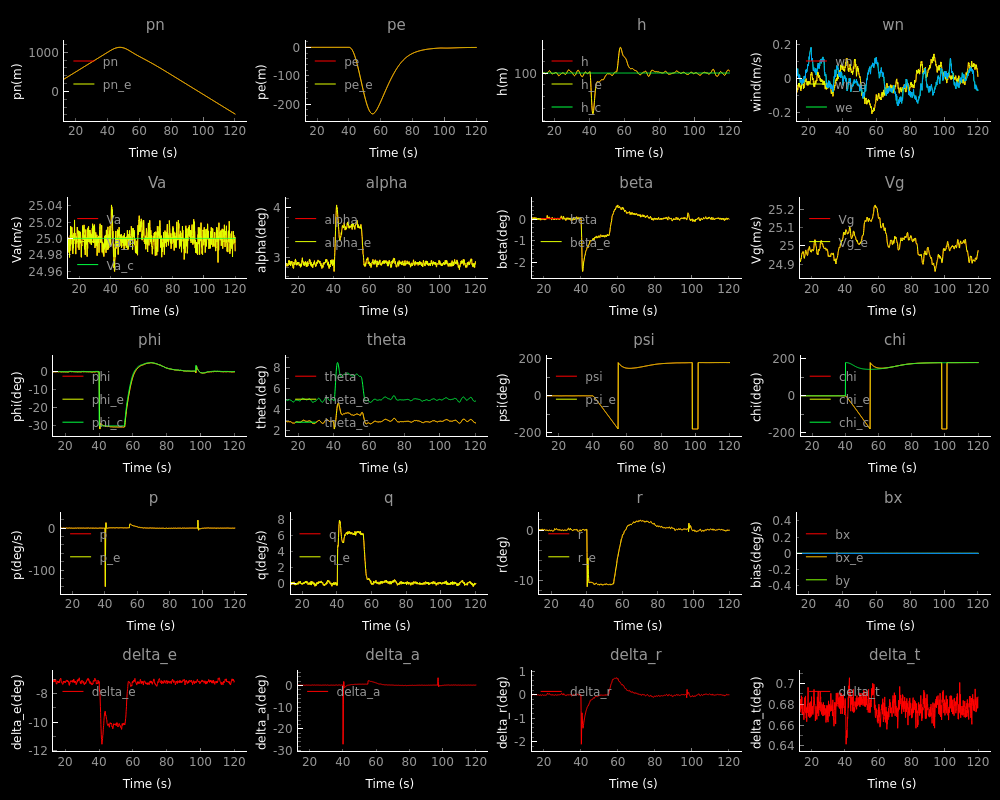

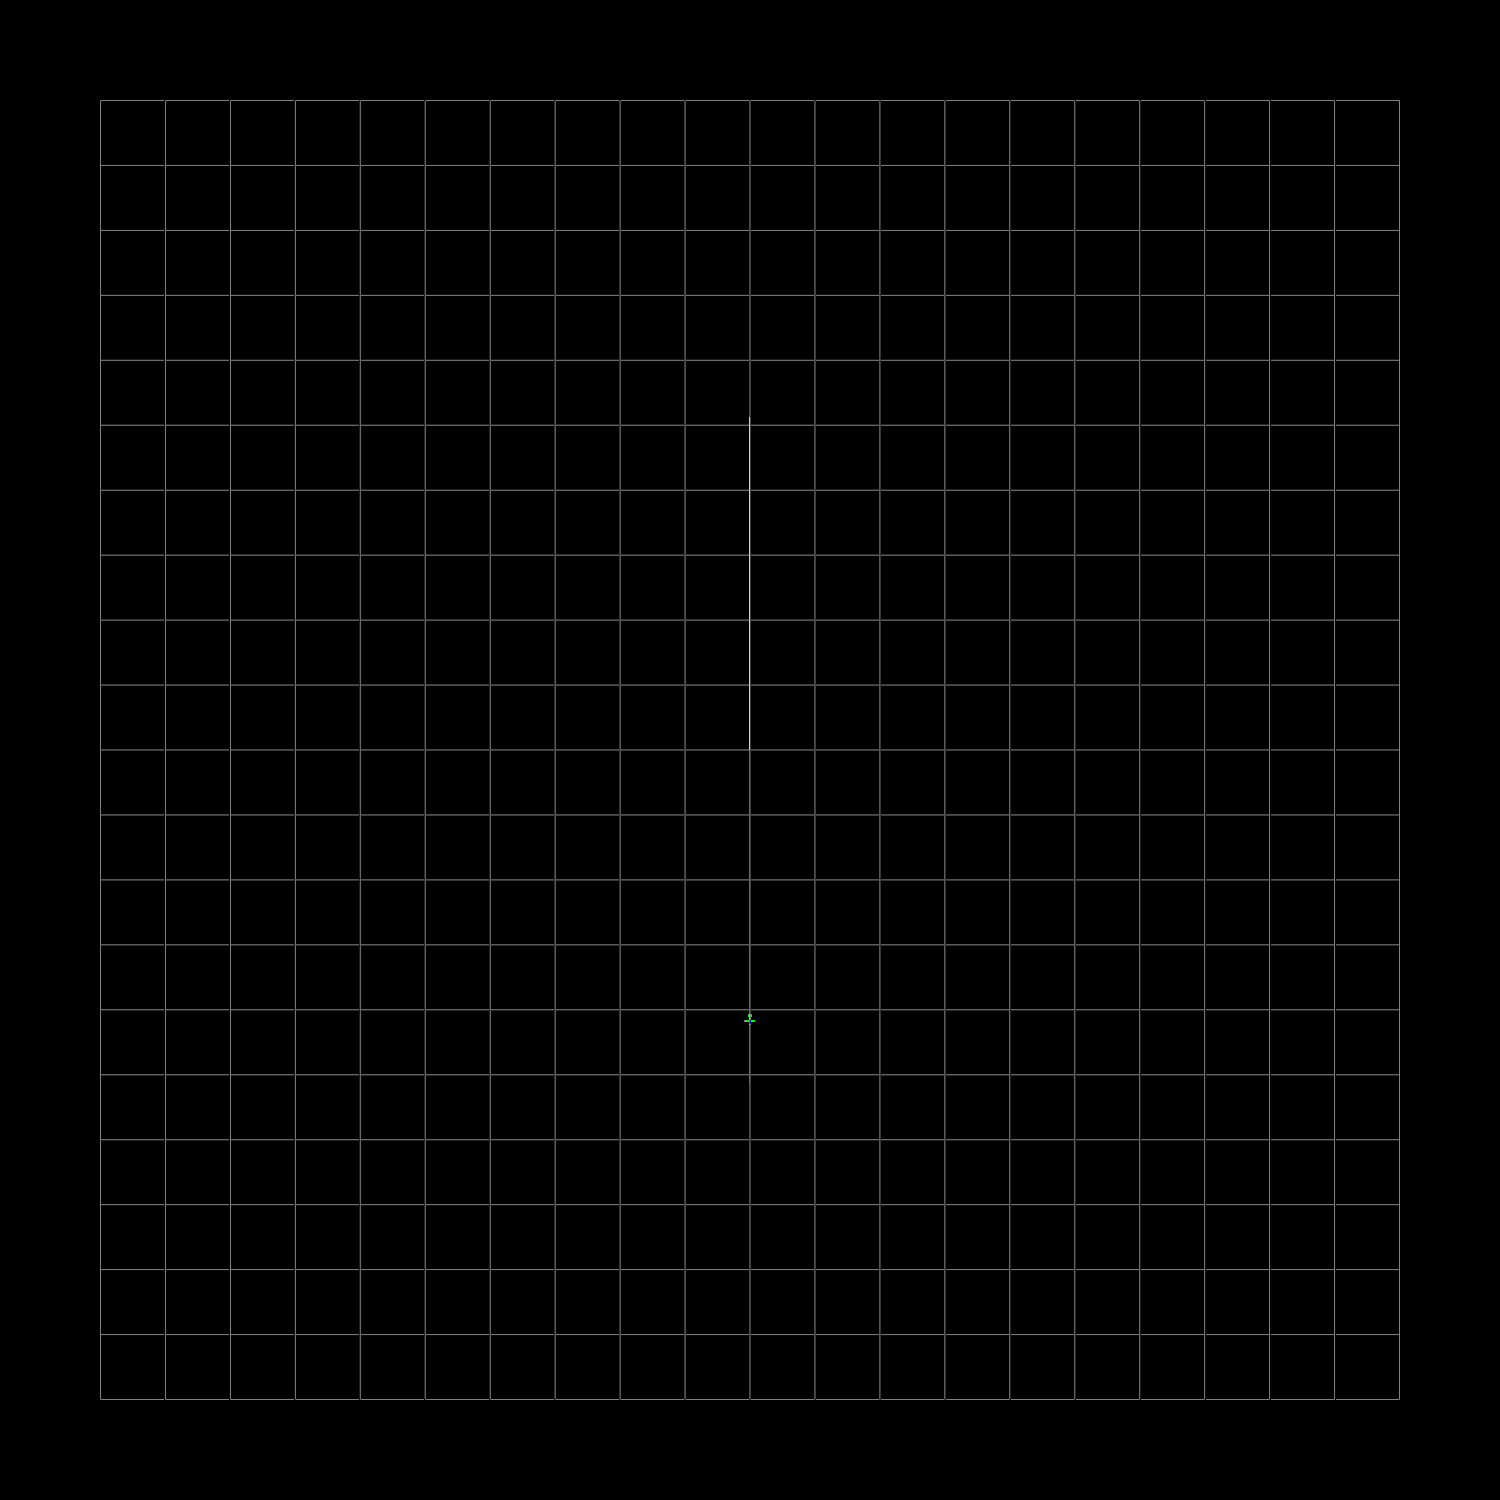

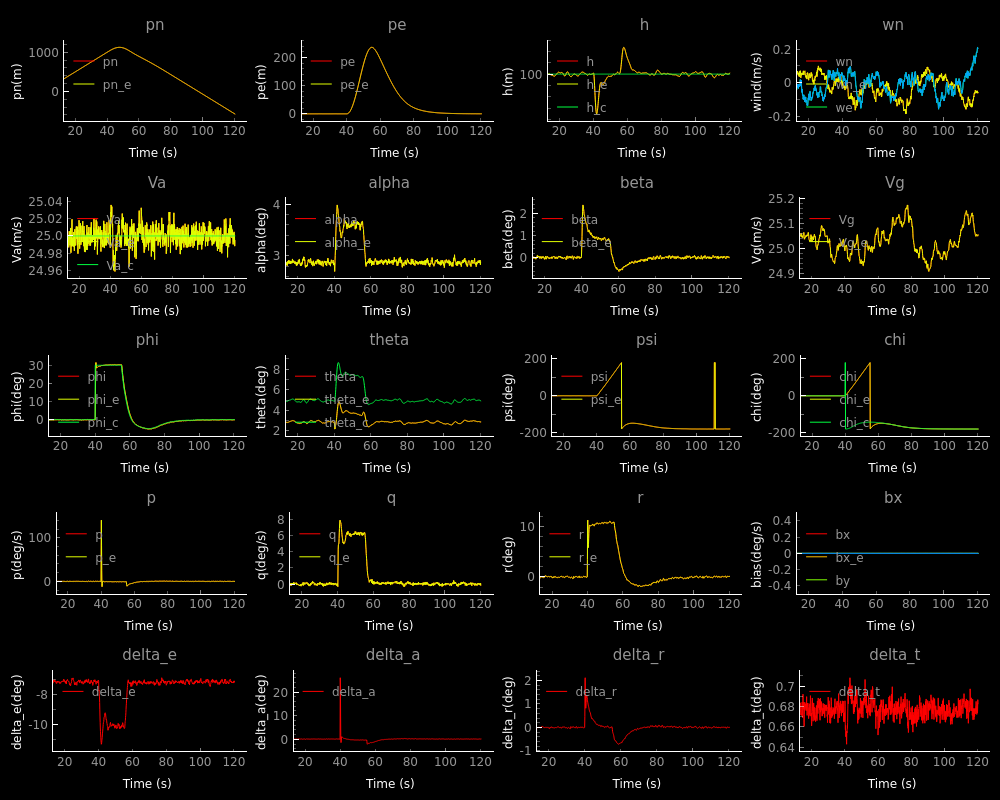

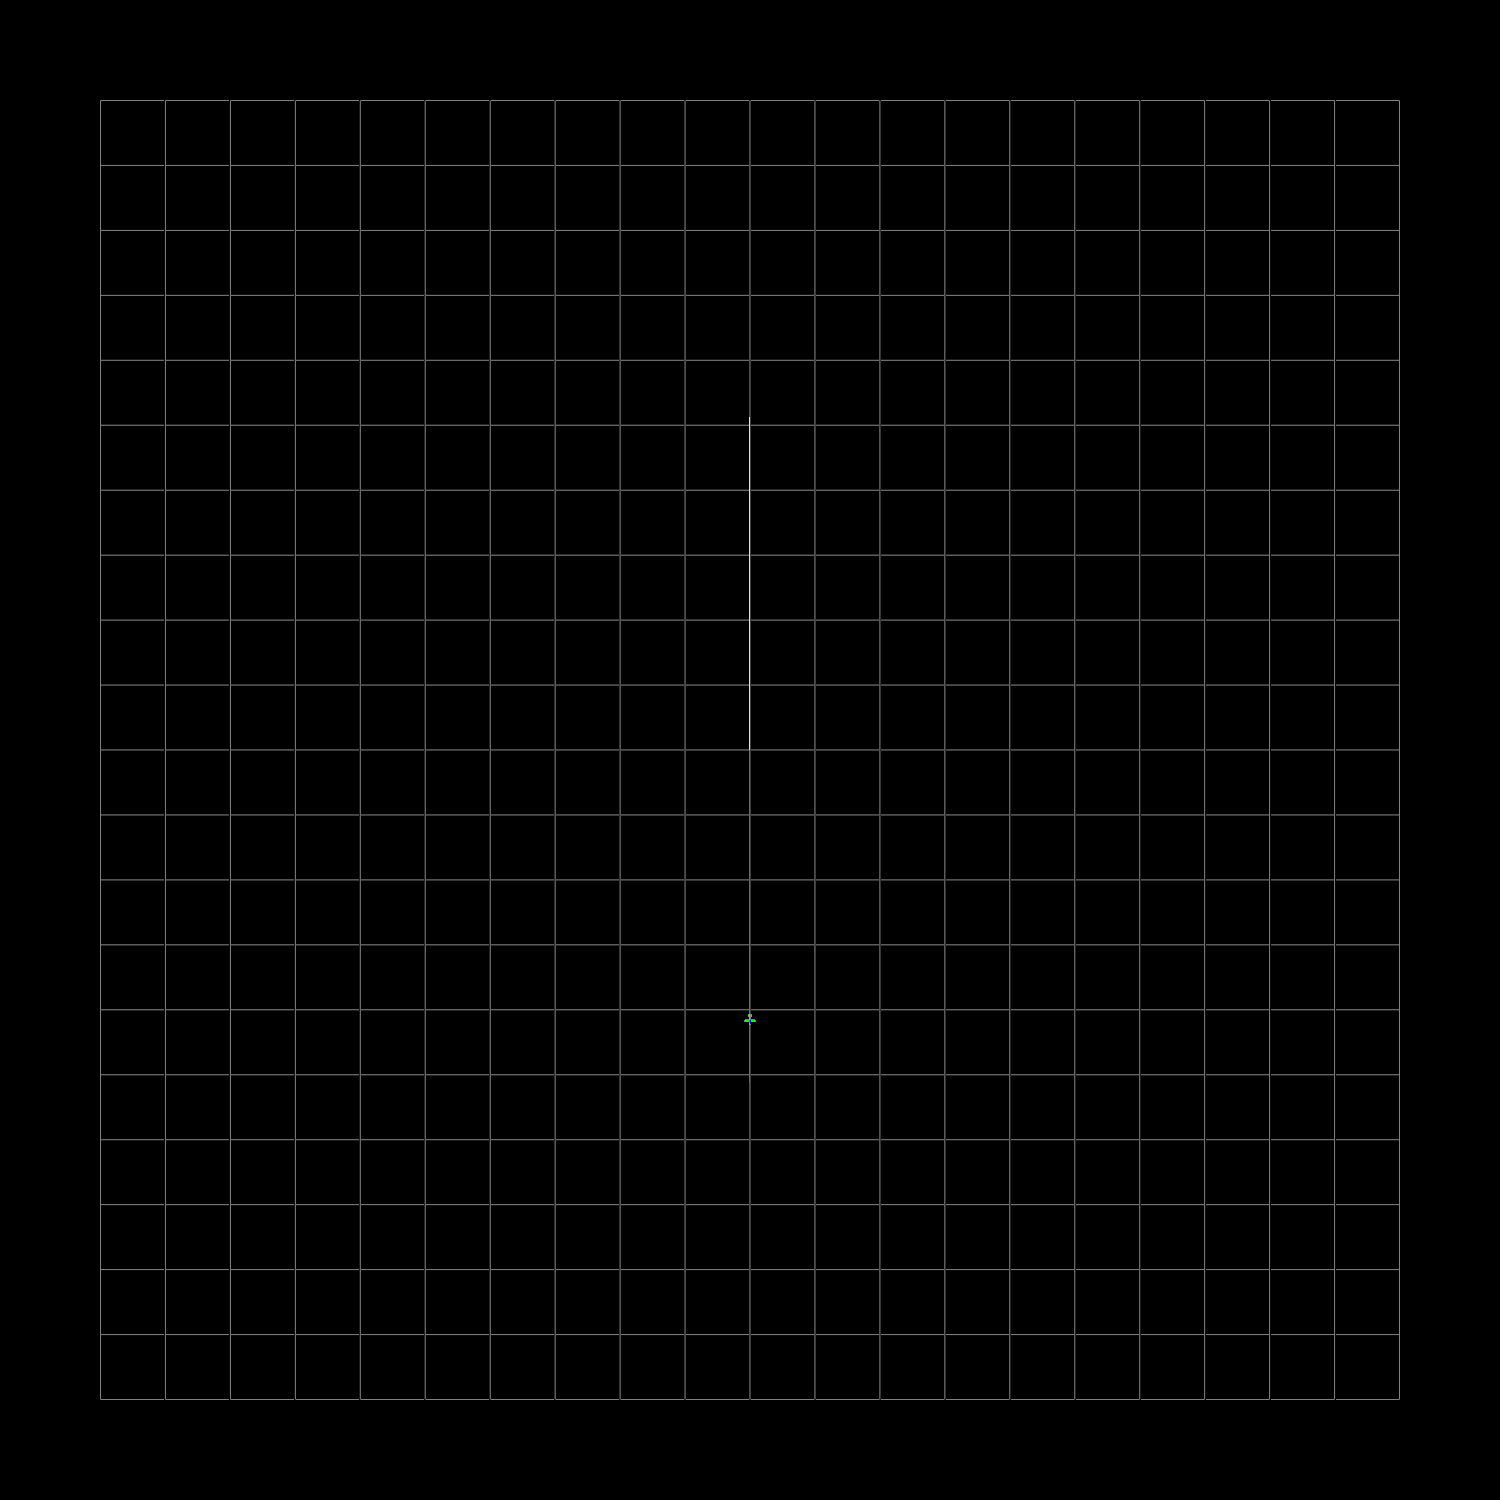

In [2]:
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "fillet"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[1000, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(45), np.inf, 0, 0)

# Run the simulation for the fillet path manager
run_sim_and_display(waypoints=waypoints)

# Run the simulation for the straight line path manager
waypoints.type = "straight_line"
waypoints.flag_waypoints_changed = True
run_sim_and_display(waypoints=waypoints)

## Problem 3 - Compare paths
Create five waypoints that are not colinear with the first and last waypoints being $w = \begin{bmatrix} 0 \\ 0 \\ -100 \end{bmatrix}$. Ensure that there is sufficient spacing between waypoints such that the fillet circles do not overlap. Run it for both the `straight-line` and `fillet` approaches. Ensure that the simulation time is sufficient to run passed the final waypoint.

If you use the same waypoints message then make sure you update flag accordingly:
* `waypoints.flag_waypoints_changed = True`

### Question: what is the difference between the performance of the straight_line path and the fillet path?
In this case the straight line follower completely missed a line segment because of over shoot so the the filet manager is much better in this case.

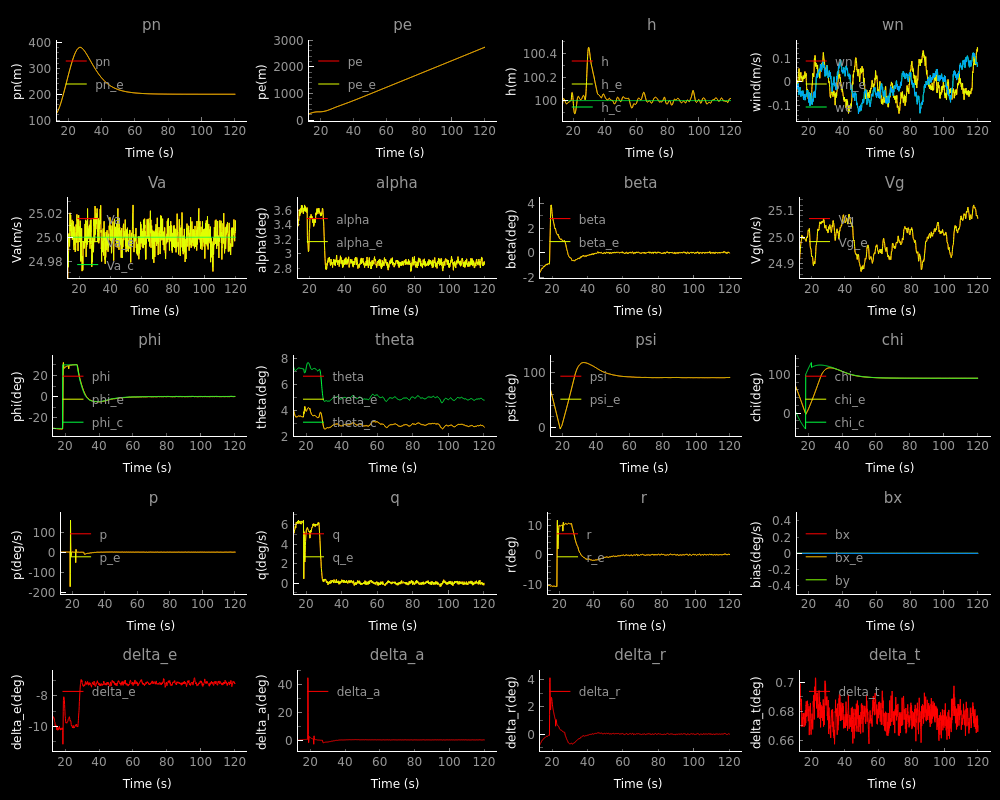

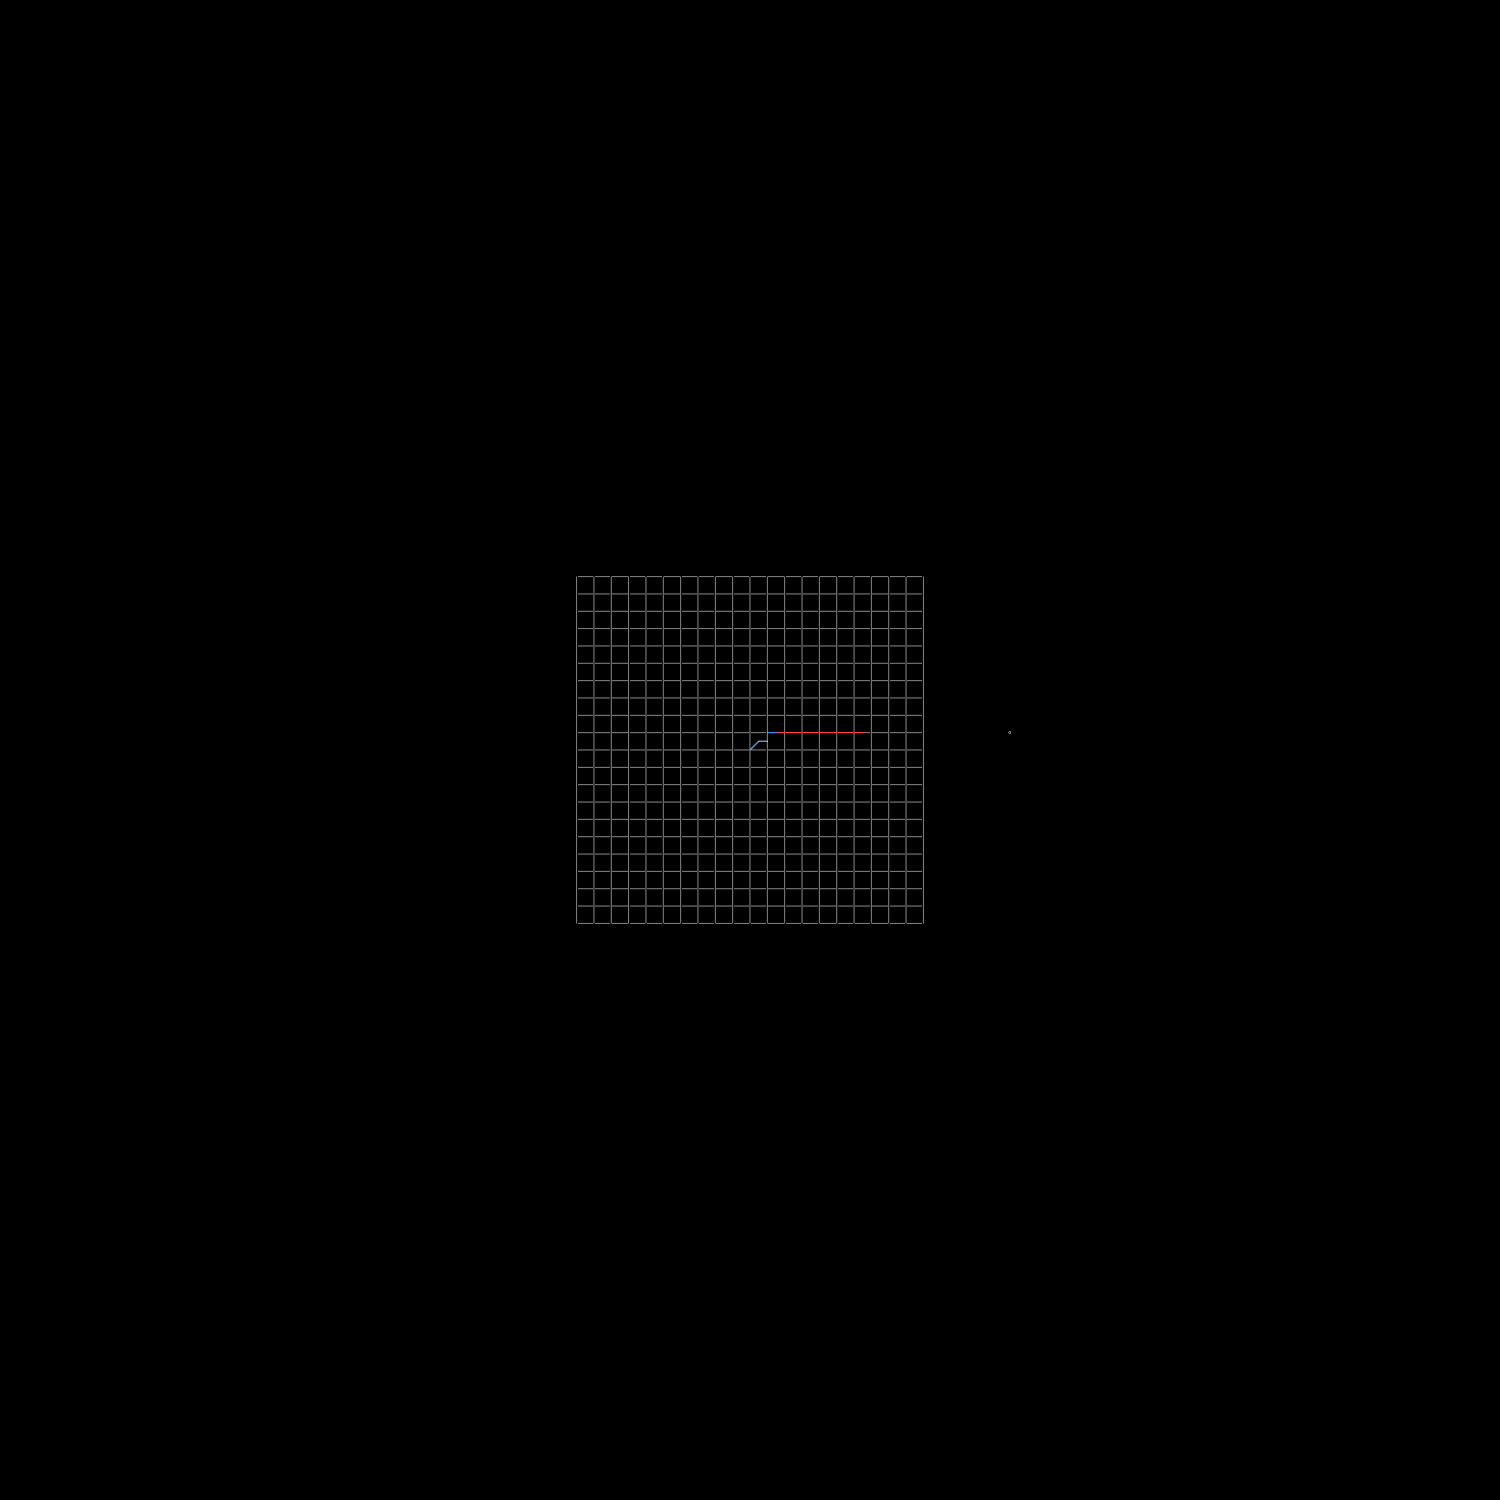

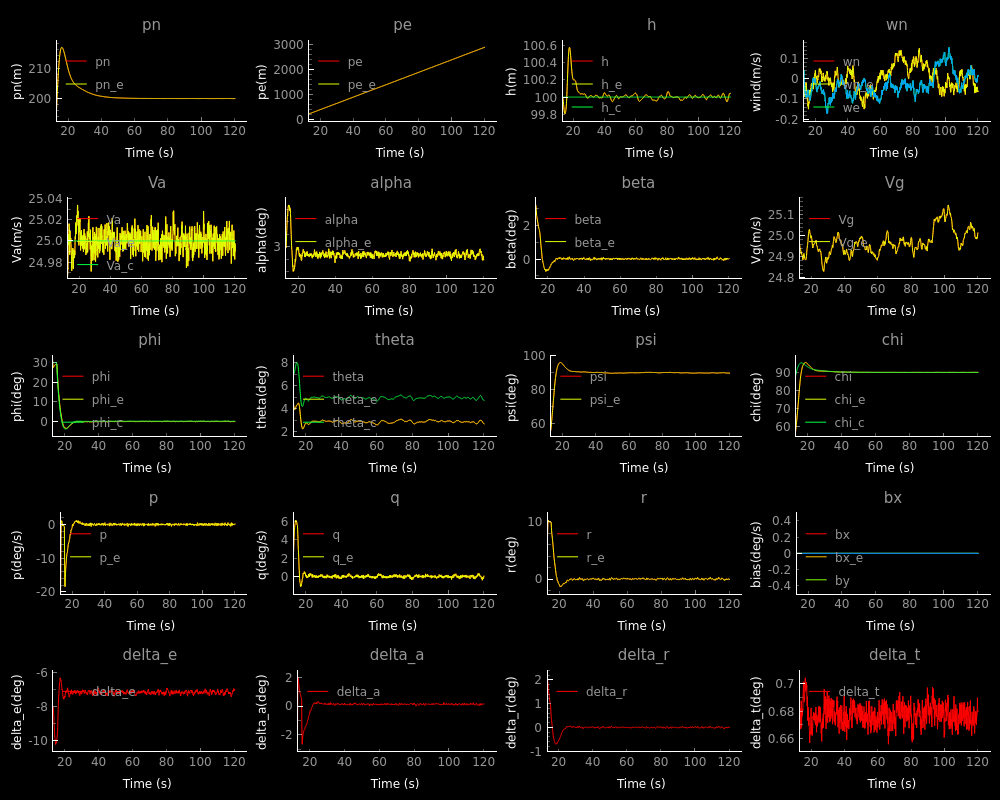

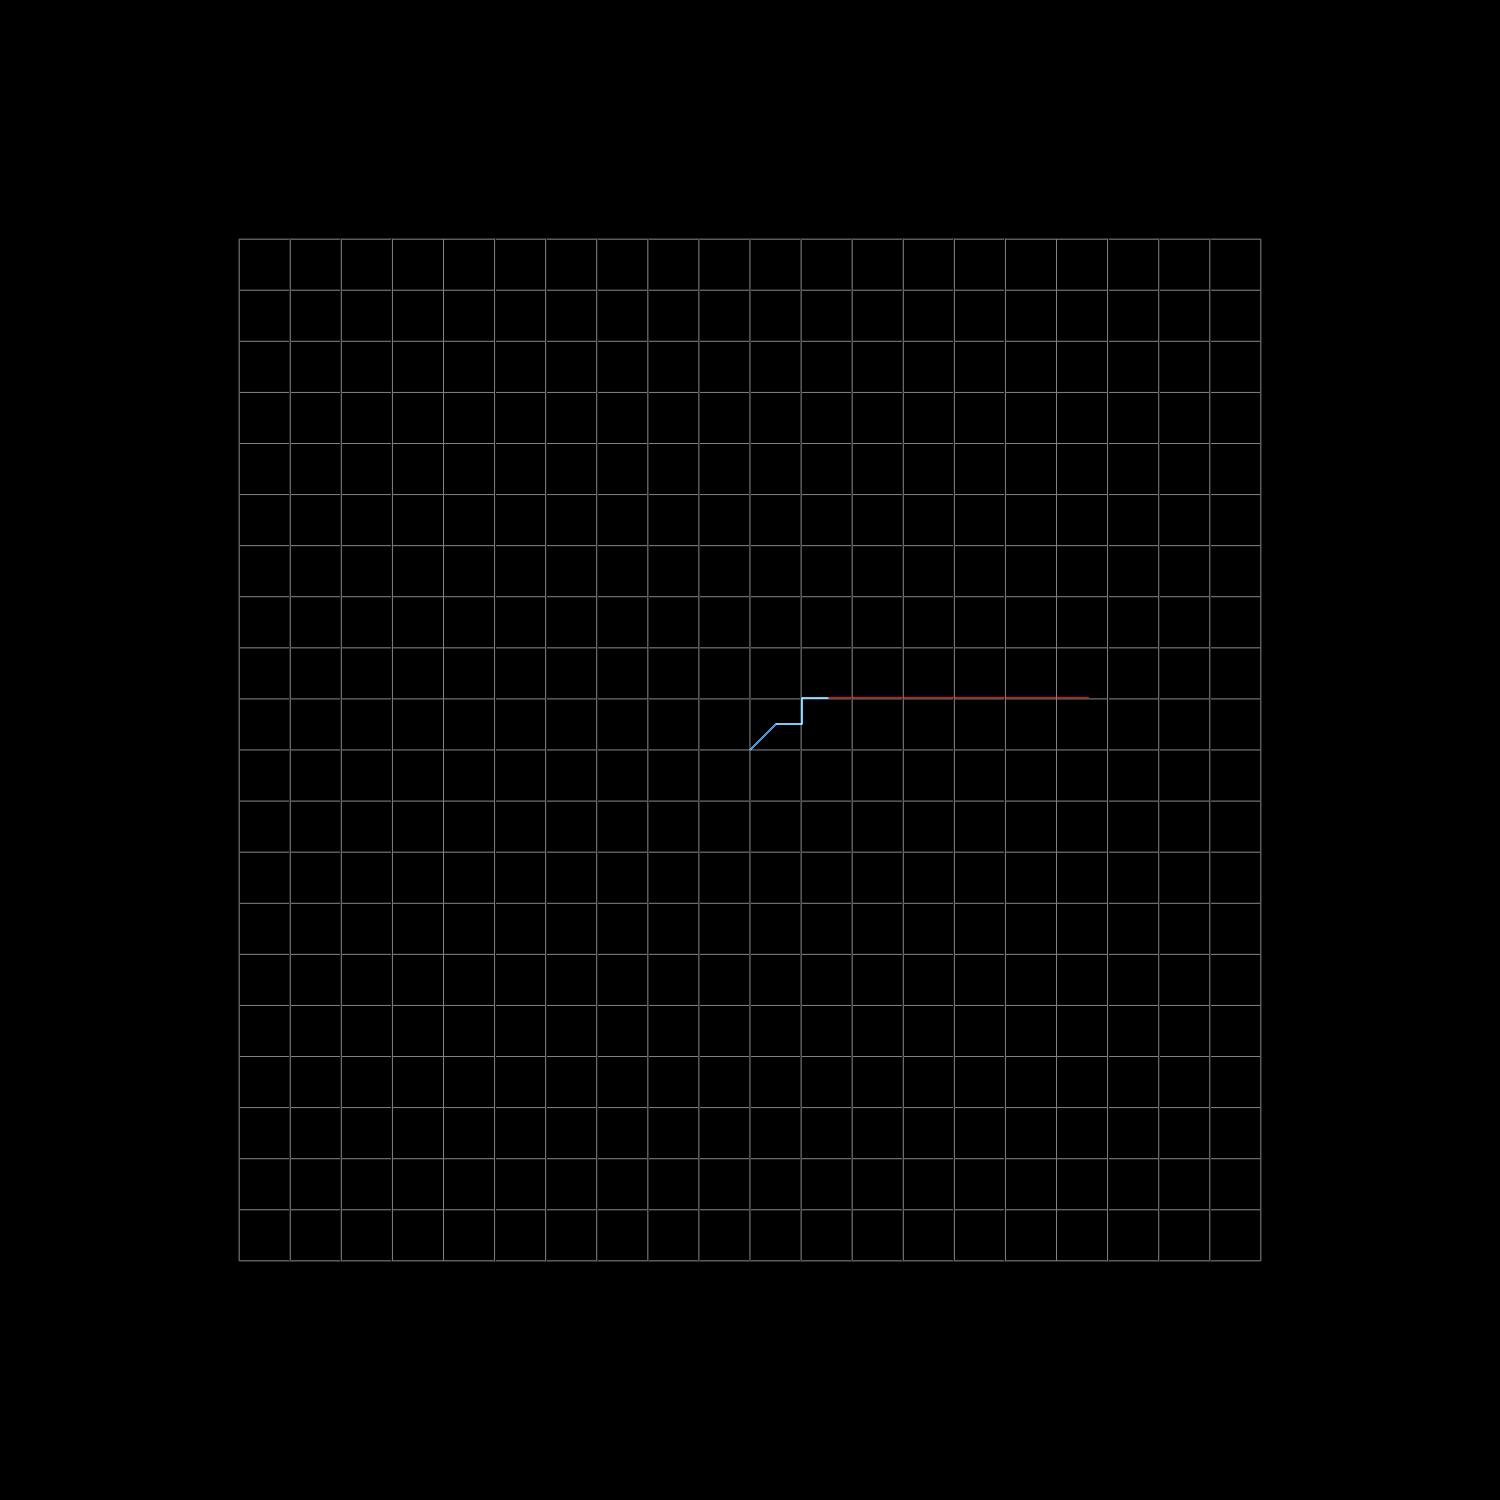

In [2]:
# code goes here
# Waypoint definition
waypoints = MsgWaypoints()
waypoints.type = "fillet"
Va = PLAN.Va0
waypoints.add(np.array([[0, 0, -100]]).T, Va, np.radians(0), np.inf, 0, 0)
waypoints.add(np.array([[100, 100, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[100, 200, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[200, 200, -100]]).T, Va, np.radians(45), np.inf, 0, 0)
waypoints.add(np.array([[200, 300, -100]]).T, Va, np.radians(45), np.inf, 0, 0)

# Run the simulation for the fillet path manager
run_sim_and_display(waypoints=waypoints)

# Run the simulation for the straight line path manager
waypoints.type = "straight_line"
waypoints.flag_waypoints_changed = True
run_sim_and_display(waypoints=waypoints)

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`. If it does, then write an explanation of why those failed tests are okay. For example, you may describe that the function is testing a fringe case where the value changes at $\pi/2$. Your function behaves well up to the boundary, but perhaps struggles with some points that are numerically on / close to the boundary.

### Reasoning for results not being perfect on the unit tests
(For each unit test that failed, write a brief explanation of why it is okay that it failed)

In [ ]:
from mav_sim.unit_tests.ch11_line_and_fillet_path_manager_test import run_all_tests

run_all_tests()